In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
titanic_data = pd.read_csv("Titanic.csv")
titanic_data.head(10)

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1
5,"Anderson, Mr Harry",1st,47.00,male,1
6,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1
7,"Andrews, Mr Thomas, jr",1st,39.00,male,0
8,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1
9,"Artagaveytia, Mr Ramon",1st,71.00,male,0


In [3]:
print("Total number of passangers in original data: "+str(len(titanic_data.index)))

Total number of passangers in original data: 1313


## Analyzing Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

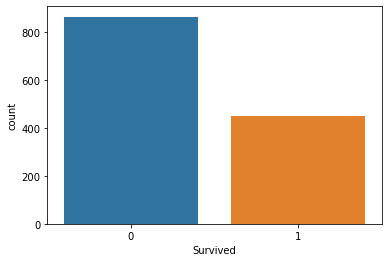

In [4]:
sns.countplot(x="Survived", data = titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

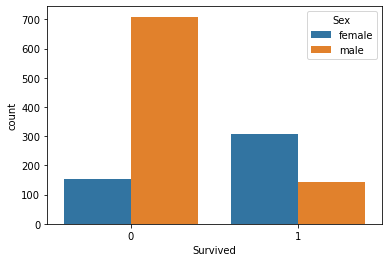

In [5]:
sns.countplot(x="Survived", hue = "Sex",data = titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

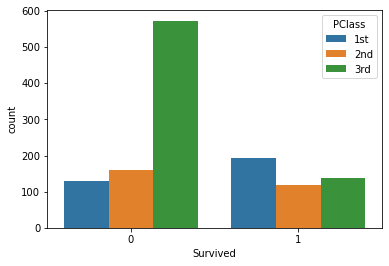

In [6]:
sns.countplot(x="Survived", hue = "PClass",data = titanic_data)

<AxesSubplot:ylabel='Frequency'>

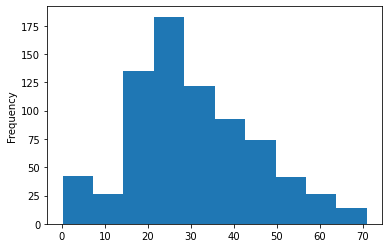

In [7]:
titanic_data["Age"].plot.hist()

## Data Cleaning

In [8]:
titanic_data.isnull()

,Name,PClass,Age,Sex,Survived
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1308,False,False,False,False,False
1309,False,False,False,False,False
1310,False,False,False,False,False
1311,False,False,False,False,False


In [9]:
titanic_data.isnull().sum()

Name          0
PClass        1
Age         557
Sex           0
Survived      0
dtype: int64

<AxesSubplot:>

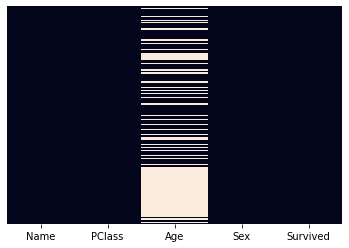

In [10]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

<AxesSubplot:>

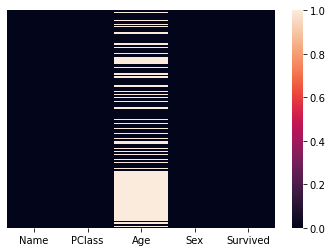

In [11]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=True)

In [12]:
titanic_data.dropna(inplace=True)

<AxesSubplot:>

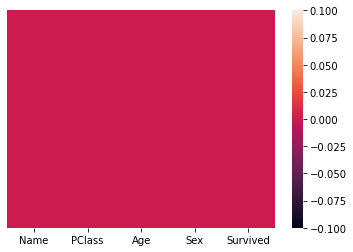

In [13]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=True)

In [14]:
titanic_data.isnull().sum()

Name        0
PClass      0
Age         0
Sex         0
Survived    0
dtype: int64

In [15]:
print("Total number of passangers in original data: "+str(len(titanic_data.index)))

Total number of passangers in original data: 756


In [16]:
pd.get_dummies(titanic_data["Sex"])

,female,male
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
1308,0,1
1309,0,1
1310,0,1
1311,0,1


In [17]:
sex = pd.get_dummies(titanic_data["Sex"],drop_first=True)
sex.head()

,male
0,0
1,0
2,1
3,0
4,1


In [18]:
Pcl = pd.get_dummies(titanic_data["PClass"],drop_first=True)
Pcl.head()

,2nd,3rd
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [19]:
titanic_data = pd.concat([titanic_data,sex,Pcl], axis=1)

In [20]:
titanic_data.head(5)

,Name,PClass,Age,Sex,Survived,male,2nd,3rd
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,0,0,0
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,0,0,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,1,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,0,0,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,1,0,0


In [21]:
titanic_data.drop(["Name","Sex","PClass"],axis=1, inplace=True)
titanic_data.head(5)

,Age,Survived,male,2nd,3rd
0,29.00,1,0,0,0
1,2.00,0,0,0,0
2,30.00,0,1,0,0
3,25.00,0,0,0,0
4,0.92,1,1,0,0


In [22]:
X = titanic_data.drop("Survived",axis=1)
y = titanic_data["Survived"]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [25]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
    
# titanic_data.isnull().sum()

LogisticRegression()

In [26]:
predictions = logmodel.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

In [28]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.92      0.86       132\n           1       0.86      0.69      0.77        95\n\n    accuracy                           0.82       227\n   macro avg       0.83      0.81      0.81       227\nweighted avg       0.83      0.82      0.82       227\n'

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,predictions)

array([[121,  11],
       [ 29,  66]])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8237885462555066